<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height:300px">
    <div style="margin: 5px; padding: 10px;">
    <h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h5 style="color:#C0C0C0">LMU, June 6, 2016</h5>
    <h4 style="color:rgba(0,0,0,0.6)">Stefanie Donner, Céline Hadziioannou, Ceri Nunn</h4>
    </div>
    <div style="float:right; margin: 20px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 100px">
        <div style="position:relative; top:40%; transform: translateY(-50%)">
        <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P07 - Filters</div>
        </div>
    </div>
   
</div>

**Please, do not forget to execute the Cell 1 first!**

In [3]:
# Cell 1: Preparation for programming
%pylab inline
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
import numpy as np
import matplotlib.pylab as plt
import os
import glob
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams['lines.linewidth'] = 0.5

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Markdown

In this notebook you are explicitly asked to work with markdown cells. This is an exercise in prepartion for the endterm report, which exclusively will be done in a notebook. 

With markdown cells you are able to include paragraphs of text within a notebook. Markdown is a "lightweight markup language with plain text formatting syntax designed so that it can be converted to HTML" (Wikipedia). To get informed on it, you can check out the wikipedia webpage. The second link provides you with a quick overview how to use markdown effectively. Acutally, you can use markdown cells by just typing your plain text but to make your text "look nice" these two links may help.

[Markdown @ Wikipedia](https://en.wikipedia.org/wiki/Markdown)

[Mardown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

To add a markdown cell to a notebook, just use the `plus` sign for adding another cell. Then, change it from `Code` into `Markdown` by selecting this option from the drop-down menu on top of the page.

### Exercise 1: Filter effects

In the following, the effect of causal and acausal filters is illustrated. 

1a) read through the following cell and try to understand what is done.

1b) Look at the figure where several lines are plotted on top of each other, describe the effect of the causal and acausal filter. 

1c) Change the order of the filter by changing ncorners. Describe what happens to the signal. You may need to uncomment version "2" of the signal in the last figure. 

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


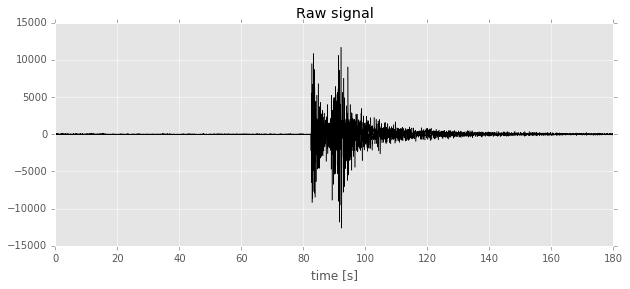

C:\Anaconda3\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "bottom left". Falling back on "best"; valid locations are
	center right
	right
	upper center
	upper right
	upper left
	center
	lower right
	lower center
	best
	lower left
	center left

  six.iterkeys(self.codes))))


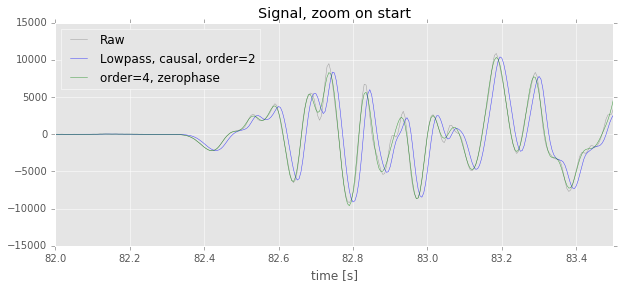

In [4]:
#Cell 2: filtering signal with different filter settings

# number of corners/order of the filter
ncorners = 4

stf = read("./DATA/RJOB_061005_072159.EHZ.mseed")
print(stf)

# Select the first trace in the Stream object
tr = stf[0]
t = tr.times()  # time vector for x axis

plt.plot(t,tr.data, 'k', label='Raw')
plt.xlabel('time [s]')
plt.title('Raw signal')
plt.show()


# filter the signal in different ways:
# causal filter / not zero phase. Order = 2
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0, zerophase=False, corners=2)

# causal filter / not zero phase. Order = set by ncorners
tr_filt2 = tr.copy()
tr_filt2.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0, zerophase=False, corners=ncorners)

# acausal filter / zero phase. Order = set by ncorners
tr_filt3 = tr.copy()
tr_filt3.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0, zerophase=True, corners=ncorners)

# Now let's plot the raw and filtered data...
# raw data:
plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
# different filter options

# change here: uncomment different combination of the three to better see their effect
# 1: causal filter / not zero phase. Order = 2
plt.plot(t, tr_filt.data, 'b', label='Lowpass, causal, order=2', alpha=0.7)
# 2: causal filter / not zero phase. Order = set by ncorners
#plt.plot(t, tr_filt2.data, 'r', label='Lowpass, causal, order=%s' % ncorners, alpha=0.7)
# 3: acausal filter / zero phase. Order = set by ncorners
plt.plot(t, tr_filt3.data, 'g', label='order=%s, zerophase' % ncorners, alpha=0.7)

plt.xlabel('time [s]')
plt.xlim(82, 83.5)    # you can use this to focus on another time in the signal
plt.title('Signal, zoom on start')
plt.legend(loc='bottom left')
plt.show()

**Answer:** ...

### Exercise 2: frequency content in seismograms

In this exercise, you will look at seismograms from the same event: the M9.0 Tohoku event on March 11, 2011. The two seismograms are recorded at two different seismic stations, one in Germany and one in China. You will see the effect of lowpass and highpass filters with different frequencies. 

First, the data is read from file and prepared. Try to understand the code in the next cell and execute it:

In [5]:
#Cell 3: prepare data from Tohoku earthquake. 
dataDir = "./DATA/"

# you can use this to trim down the signal to a shorter length if your computer is struggling. However, be aware 
# that you will have to re-run this cell and all others below it if you want to use a longer signal again. 
t1 = UTCDateTime("2011-03-11T05:00:00.000")
t2 = UTCDateTime("2011-03-11T10:00:00.000")

# Tohoku event, recorded in Germany
network1 = "GR"
station1 = "WET"
ch1 = "B*"

stt1 = Stream()
for filename in glob.glob(dataDir + "/*%s*.mseed" % station1):
    stt1 += read(filename)

# make a copy to keep our original data
stt1_orig = stt1.copy()
stt1.trim(t1,t2)
print("Available data for German station: ")
print(stt1)
#stt1.plot()

# Tohoku event, recorded in China
network2 = "IC"
station2 = "WMQ"
loc2 = "00"
ch2 = "B*"

stt2 = Stream()
for filename in glob.glob(dataDir + "/*%s*.mseed" % station2):
    stt2 += read(filename)

# make a copy to keep our original data
stt2_orig = stt2.copy()
stt2.trim(t1, t2)
print("Available data for Chinese station: ")
print(stt2)
#stt2.plot()

Available data for German station: 
3 Trace(s) in Stream:
GR.WET..BHN | 2011-03-11T05:00:00.024999Z - 2011-03-11T10:00:00.024999Z | 20.0 Hz, 360001 samples
GR.WET..BHZ | 2011-03-11T05:00:00.025000Z - 2011-03-11T10:00:00.025000Z | 20.0 Hz, 360001 samples
GR.WET..BHE | 2011-03-11T05:00:00.024999Z - 2011-03-11T10:00:00.024999Z | 20.0 Hz, 360001 samples
Available data for Chinese station: 
3 Trace(s) in Stream:
IC.WMQ.00.BHE | 2011-03-11T04:59:59.997382Z - 2011-03-11T09:59:59.997382Z | 20.0 Hz, 360001 samples
IC.WMQ.00.BHN | 2011-03-11T04:59:59.997382Z - 2011-03-11T09:59:59.997382Z | 20.0 Hz, 360001 samples
IC.WMQ.00.BHZ | 2011-03-11T04:59:59.997382Z - 2011-03-11T09:59:59.997382Z | 20.0 Hz, 360001 samples


2a) In the following cell, filters are applied and the resulting signals are plotted. Try to understand what is plotted.
You can use the time limits (xstart, xend) to zoom in to part of signal you are interested in. 

2b) Adapt the corner frequency of the lowpass filter to highlight the surface waves. Change xstart and xend to zoom in on the part of the seismogram with surface waves, if that helps. Which range of frequencies are represented, approximately? 

2c) Repeat the process, but now adapt the corner frequency of the highpass filter to highlight the body waves. What can you say about the frequency range?

2d) Isolate the frequencies above 5 Hz: what difference do you notice between the records at the two different stations?


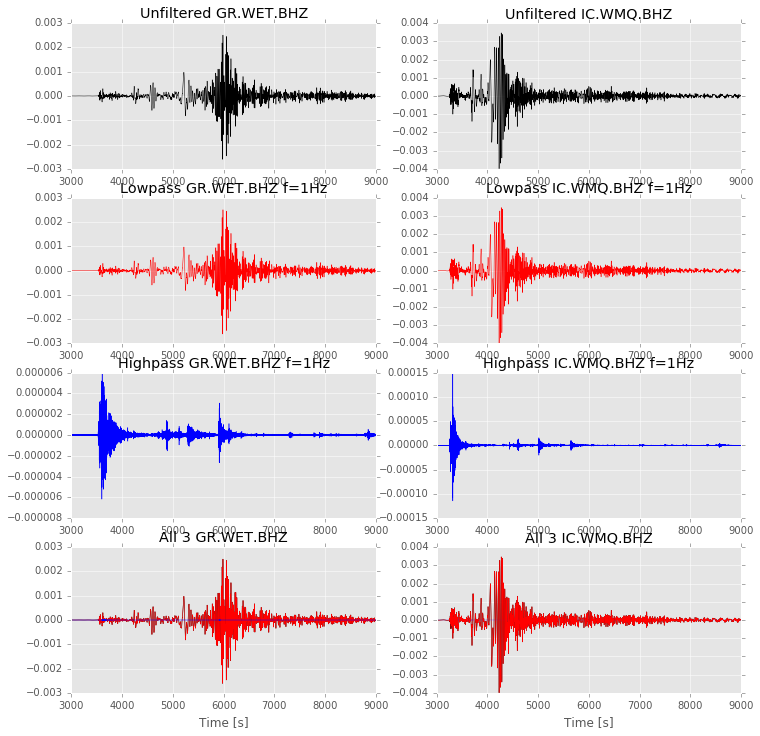

In [6]:
#Cell 4: highpass and lowpass filtering

# frequency (in Hz) to use as a corner frequency for the lowpass filter:
freqlow = 1
# frequency (in Hz) to use as a corner frequency for the highpass filter:
freqhigh = 1

# x axis limits in the plot, in seconds
xstart = 3000
xend = 9000 # max 18000

# you should not need to change anything after here:
# low pass filter
stt1_low = stt1.copy()  # Germany
stt1_low.filter("lowpass", freq=freqlow)
stt2_low = stt2.copy()  # China
stt2_low.filter("lowpass", freq=freqlow)


# high pass filter
stt1_high = stt1.copy()   #Germany
stt1_high.filter("highpass", freq=freqhigh)
stt2_high = stt2.copy()   # China
stt2_high.filter("highpass", freq=freqhigh)


# which channel do you want to plot? BHZ, BHN, BHE
channel = "BHZ"

# Plot the seismograms 
# German station
sec = stt1_high.select(channel=channel)[0].times()

plt.figure(figsize=(12,12))
plt.subplot(421)
plt.title("Unfiltered %s.%s.%s" % (network1, station1, channel))
plt.plot(sec, stt1.select(channel=channel)[0].data, 'k')
plt.xlim((xstart, xend))

plt.subplot(423)
plt.title("Lowpass %s.%s.%s f=%sHz" % (network1, station1, channel, freqlow))
plt.plot(sec, stt1_low.select(channel=channel)[0].data, 'r')
plt.xlim((xstart, xend))

plt.subplot(425)
plt.title("Highpass %s.%s.%s f=%sHz" % (network1, station1, channel, freqhigh))
plt.plot(sec, stt1_high.select(channel=channel)[0].data, 'b')
plt.xlim((xstart, xend))

plt.subplot(427)
plt.title("All 3 %s.%s.%s" % (network1, station1, channel))
plt.plot(sec, stt1.select(channel=channel)[0].data, 'k')
plt.plot(sec, stt1_low.select(channel=channel)[0].data, 'r')
plt.plot(sec, stt1_high.select(channel=channel)[0].data, 'b')
plt.xlim((xstart, xend))
plt.xlabel('Time [s]')

# Chinese station
sec = stt2_high.select(channel=channel)[0].times()

plt.subplot(422)
plt.title("Unfiltered %s.%s.%s" % (network2, station2, channel))
plt.plot(sec, stt2.select(channel=channel)[0].data, 'k')
plt.xlim((xstart, xend))

plt.subplot(424)
plt.title("Lowpass %s.%s.%s f=%sHz" % (network2, station2, channel, freqlow))
plt.plot(sec, stt2_low.select(channel=channel)[0].data, 'r')
plt.xlim((xstart, xend))

plt.subplot(426)
plt.title("Highpass %s.%s.%s f=%sHz" % (network2, station2, channel, freqhigh))
plt.plot(sec, stt2_high.select(channel=channel)[0].data, 'b')
plt.xlim((xstart, xend))

plt.subplot(428)
plt.title("All 3 %s.%s.%s" % (network2, station2, channel))
plt.plot(sec, stt2.select(channel=channel)[0].data, 'k')
plt.plot(sec, stt2_high.select(channel=channel)[0].data, 'b', alpha=0.5)
plt.plot(sec, stt2_low.select(channel=channel)[0].data, 'r')
plt.xlim((xstart, xend))
plt.xlabel('Time [s]')
plt.show()

**Answer:** ...

### Frequency content in seismograms, continued
We will now look at a different event which has been recorded by the Chinese station used in the previous exercise. The event took place in Kazakhstan on July 8, 1989. 

In the following, the data is loaded and instrument corrected. 

In [ ]:
#Cell 5: Preparation of data for 1989 event

network = "CD"
station = "WMQ"
ch = 'BHZ' #or BHN BHE

t1 = UTCDateTime("1989-07-08T00:00:00.000")
t2 = UTCDateTime("1989-07-08T23:00:00.000")

# change this to point to wherever you stored your data locally
dataDir = "./DATA/"

# no need to change the following
fileName = os.path.join(dataDir, "%s.%s..%s.SAC" % (network, station, ch))
st = read(fileName)

# correct for instrument response -- no need to change this;
for tr in st:

    # instrument response file
    respf = dataDir + "CD.WMQ.." + tr.stats.channel + ".resp"

    # define a filter band to prevent amplifying noise during the deconvolution
    pre_filt = (0.005, 0.006, 30.0, 35.0)

    # this can be the date of your raw data or any date for which the
    # SEED RESP-file is valid
    date = t1

    seedresp = {'filename': respf,  # RESP filename
                # when using Trace/Stream.simulate() the "date" parameter can
                # also be omitted, and the starttime of the trace is then used.
                'date': date,
                # Units to return response in ('DIS', 'VEL' or ACC)
                'units': 'VEL'
                }

    # Remove instrument response using the information from the given RESP file
    tr.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)

# keep a copy of the stream just in case. Work on `st' in the following
st_backup = st.copy()

print("instrument response removed")

print("Available data:")
print(st)

The signal is now bandpassed in several different frequency bands. 

#### 2e) Look at the filtered signals and answer the following: 
- In which frequency ranges do you see surface waves?
- Why do you see surface wave packets arriving at different times for different frequency bands?
- At which frequencies are most body waves present? 
- In which frequency range does most scattering happen?



In [ ]:
#Cell 6: filtering with bandpass filters with different frequency ranges

st2 = st.copy()
st2.filter(type="bandpass", freqmin=0.01, freqmax=0.05)

st3 = st.copy()
st3.filter(type="bandpass", freqmin=0.05, freqmax=0.1)

st4 = st.copy()
st4.filter(type="bandpass", freqmin=0.1, freqmax=0.5)

st5 = st.copy()
st5.filter(type="bandpass", freqmin=0.5, freqmax=1)

st6 = st.copy()
st6.filter(type="bandpass", freqmin=1, freqmax=5)

st7 = st.copy()
st7.filter(type="bandpass", freqmin=5, freqmax=10)

tr = st[0]
time = tr.times()

plt.figure(figsize=(15,18))
plt.subplot(711)
plt.plot(time, tr.data, 'k', linewidth=0.5)
plt.title('Unfiltered')
plt.ylabel('Velocity [m/s]')
plt.subplot(712)
plt.title('0.01 - 0.05 Hz')
plt.plot(time, st2[0].data, 'k', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.subplot(713)
plt.title('0.05 - 0.1 Hz')
plt.plot(time, st3[0].data, 'k', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.subplot(714)
plt.title('0.1 - 0.5 Hz')
plt.plot(time, st4[0].data, 'k', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.subplot(715)
plt.title('0.5 - 1 Hz')
plt.plot(time, st5[0].data, 'k', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.subplot(716)
plt.title('1 - 5 Hz')
plt.plot(time, st6[0].data, 'k', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.subplot(717)
plt.title('5 - 10 Hz')
plt.plot(time, st7[0].data, 'k', linewidth=0.5)
plt.ylabel('Velocity [m/s]')
plt.xlabel('Time [s]')
plt.show()


**Answer:** ...

## Exercise 3: time-frequency plot

In this exercise you will change the window length of the sliding window used by the spectrogram function to illustrate the uncertainty principle. You can compare the effect of different window lengths in the plot easily by setting NFFT and NFFT2 to two different values. In the spectrogram plots, lighter colors (yellow, white) represent frequencies and times at which more energy is present in the signal. 

3a) set NFFT to a larger value and run the cell again. Incrementally increase to values around about 3000 points. Describe what happens. 

3b) Zoom in to the start of the signal by changing xstart and xend. Does a longer or shorter window length allow you to identify the start of the signal more easily?

3c) Now adapt the time limits to look at the surface waves. Can you see the effect of dispersion? With which window length is this effect clearer?


In [ ]:
# Cell 7: Plotting a spectrogram

NFFT = 256              # the length of the spectrogram window in sample points, version 1
NFFT2 = 256            # length of spectrogram window, version 2 
Fs = int(tr.stats.sampling_rate)  # the sampling frequency
noverlap = 50      # number of sample points that the sliding window overlaps, must be less than NFFT

plot_freq_min = 0       # the lower frequency bound for the plot, in Hz
plot_freq_max = 0.2     # the upper frequency bound for the plot, in Hz

# x axis limits in the plot, in seconds
xstart = 0
xend = 50000 


# note: if this is taking too long, or ends in a "MemoryError", try using a longer window length "wlen" (in seconds)
# looking at a shorter time window can also help (try adapting t1 and t2 in cell number XXX. But watch out, 
# this will shorten the signal permanently until you rerun all cells)

# We'll be using the signal from the Tohoku event recorded in Germany
tr = stt1_orig[0].copy()

plt.figure(figsize=(15,12))
ax1 = plt.subplot(311)
plt.plot(tr.times(), tr.data, linewidth=0.5)
plt.ylabel('velocity [m/s]')
plt.subplot(312, sharex=ax1)
plt.title('spectrogram, window length %s pts' % NFFT)
Pxx, freqs, bins, im = plt.specgram(tr.data, NFFT=NFFT, Fs=tr.stats.sampling_rate, noverlap=noverlap,
                                cmap=cm.gist_heat)
# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage instance
plt.ylabel('frequency [Hz]')
plt.ylim((plot_freq_min, plot_freq_max))
plt.subplot(313, sharex=ax1)
plt.title('spectrogram, window length %s pts' % NFFT2)
Pxx, freqs, bins, im = plt.specgram(tr.data, NFFT=NFFT2, Fs=tr.stats.sampling_rate, noverlap=noverlap,
                                cmap=cm.gist_heat)
plt.ylim((plot_freq_min, plot_freq_max))
plt.ylabel('frequency [Hz]')
plt.xlabel('time [s]')
plt.xlim((xstart, xend))

plt.show()

**Answer:** ...